In [1]:
import pandas as pd
#カラム内の文字数。デフォルトは50だった
pd.set_option("display.max_colwidth", 80)

#行数
pd.set_option("display.max_rows", 101)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from sklearn.utils.multiclass import unique_labels
from mpl_toolkits.axes_grid1 import make_axes_locatable



import PIL
from PIL import Image

In [2]:
description = {}

description['peta'] = ['accessoryHat', 'accessoryMuffler', 'accessoryNothing', 'accessorySunglasses', 
                       'hairLong', 
                       'upperBodyCasual', 'upperBodyFormal', 'upperBodyJacket', 'upperBodyLogo', 'upperBodyPlaid', 'upperBodyShortSleeve', 'upperBodyThinStripes', 'upperBodyTshirt', 'upperBodyOther', 'upperBodyVNeck',
                       'lowerBodyCasual', 'lowerBodyFormal', 'lowerBodyJeans', 'lowerBodyShorts', 'lowerBodyShortSkirt', 'lowerBodyTrousers',
                       'footwearLeatherShoes', 'footwearSandals', 'footwearShoes', 'footwearSneaker',
                       'carryingBackpack', 'carryingOther', 'carryingMessengerBag', 'carryingNothing', 'carryingPlasticBags',
                       'personalLess30', 'personalLess45', 'personalLess60', 'personalLarger60', 'personalMale']

description['peta_age_gender'] = ['personalLess30', 'personalLess45', 'personalLess60', 'personalLarger60', 'personalMale', 'personalFemale']

description['pa100k'] = ['Hat', 'Glasses', 
                         'ShortSleeve', 'LongSleeve', 
                         'UpperStride', 'UpperLogo', 'UpperPlaid', 'UpperSplice', 'LowerStripe','LowerPattern', 'LongCoat', 
                         'Trousers', 'Shorts', 'Skirt&Dress', 
                         'boots', 
                         'HandBag', 'ShoulderBag', 'Backpack', 
                         'HoldObjectsInFront', 
                         'AgeOver60', 'Age18-60', 'AgeLess18', 
                         'Female', 
                         'Front', 'Side', 'Back']

description['pa100k_age_gender'] = ['AgeOver60', 'Age18-60', 'AgeLess18', 'Female', 'Male']

description['rap'] = ['hs-BaldHead', 'hs-LongHair', 'hs-BlackHair', 'hs-Hat', 'hs-Glasses', 'hs-Muffler', 'ub-Shirt', 'ub-Sweater', 'ub-Vest', 'ub-TShirt', 'ub-Cotton',
                     'ub-Jacket', 'ub-SuitUp', 'ub-Tight', 'ub-ShortSleeve', 'lb-LongTrousers', 'lb-Skirt', 'lb-ShortSkirt', 'lb-Dress', 'lb-Jeans', 'lb-TightTrousers',
                     'shoes-Leather', 'shoes-Sport', 'shoes-Boots', 'shoes-Cloth', 'shoes-Casual', 
                      'attach-Backpack', 'attach-SingleShoulderBag', 'attach-HandBag', 'attach-Box', 'attach-PlasticBag', 'attach-PaperBag', 'attach-HandTrunk', 'attach-Other', 
                      'AgeLess16', 'Age17-30', 'Age31-45', 'Female', 
                      'BodyFat', 'BodyNormal', 'BodyThin', 'Customer', 'Clerk', 'action-Calling', 'action-Talking', 'action-Gathering', 'action-Holding', 'action-Pusing', 'action-Pulling', 'action-CarrybyArm', 'action-CarrybyHand']

description['rap_age_gender'] = ['AgeLess16', 'Age17-30', 'Age31-45', 'Female', 'Male']

description['rap2'] = ['hs-BaldHead', 'hs-LongHair', 'hs-BlackHair', 'hs-Hat', 'hs-Glasses', 
                        'ub-Shirt', 'ub-Sweater', 'ub-Vest', 'ub-TShirt', 'ub-Cotton', 'ub-Jacket', 'ub-SuitUp', 'ub-Tight', 'ub-ShortSleeve', 'ub-Others',
                        'lb-LongTrousers', 'lb-Skirt', 'lb-ShortSkirt', 'lb-Dress', 'lb-Jeans', 'lb-TightTrousers', 
                        'shoes-Leather', 'shoes-Sports', 'shoes-Boots', 'shoes-Cloth', 'shoes-Casual', 'shoes-Other', 
                        'attachment-Backpack', 'attachment-ShoulderBag', 'attachment-HandBag', 'attachment-Box', 'attachment-PlasticBag', 'attachment-PaperBag', 'attachment-HandTrunk', 'attachment-Other',
                        'AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60', 
                        'Female', 'BodyFat', 'BodyNormal', 'BodyThin', 'Customer', 'Employee', 
                        'action-Calling', 'action-Talking', 'action-Gathering', 'action-Holding', 'action-Pushing', 'action-Pulling', 'action-CarryingByArm', 'action-CarryingByHand', 'action-Other']

description['rap2_age_gender'] = ['AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60', 'Female', 'Male']
description['person_attribute'] = ['AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60', 'AgeOver60', 'Female', 'Male']

In [3]:
def convert_id_to_name(id_str_list, attr_name_mappings):
    label_ids = id_str_list.split()
    map_object = map(int, label_ids)
    id_num_list = list(map_object)

    attr_name_list = [attr_name_mappings[int(i)] for i in id_num_list]
    return attr_name_list

In [4]:
def plot_results(df, img_dir, dataset_name='pa100k'):
    fig = plt.figure(figsize=(5 * 5, 5 * 6))
    fig.subplots_adjust(wspace=5.5, hspace=0.5)
    for i, (art_id, gt_label, pred_label) in enumerate(df.sort_values(by="image_id", ascending=False)[["image_id", "gt_label", "class_id"]].values[50:65]):
        ax = fig.add_subplot(5, 3, i // 3 * 3 + i % 3 + 1)
        im = Image.open(f"{img_dir}/{art_id}")
        ax.imshow(im)
        im.close()

        gt_attr_names = convert_id_to_name(gt_label, description[dataset_name])
        pred_attr_names = convert_id_to_name(pred_label, description[dataset_name])
        
        gt_list_half_size = int(len(gt_attr_names)/2)
        pred_list_half_size = int(len(pred_attr_names)/2)
#         print(list_half_size)

        ax.set_title("image id: {}\ngt: {}\n{}\n\npred: {}\n{}".format(art_id, gt_attr_names[:gt_list_half_size], gt_attr_names[gt_list_half_size:], pred_attr_names[:pred_list_half_size], pred_attr_names[pred_list_half_size:]))

In [5]:
def plot_confusion_matrix(data, labels, output_filename):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    sn.set(color_codes=True)
    plt.figure(1, figsize=(12, 9))
 
    plt.title("Confusion Matrix")
 
    sn.set(font_scale=1.4)
    ax = sn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'},fmt="d")
 
#     ax.set_xticklabels(labels)
#     ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label", title=labels)
    plt.show()
 
#     plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.close()

In [6]:
def plot_confusion_matrix_v2(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          multi_label=False,
                          index = None,
                          cmap=plt.cm.Blues,
                          output_filename=None):
    """
    Refer to: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
            
        # Compute confusion matrix        
    if multi_label:
        cm = multilabel_confusion_matrix(y_true, y_pred)
    else:
        cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    
    
    if index is not None:
        cm = cm[index]
#         classes = classes[index]
        
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, fontsize=15)
    plt.yticks(tick_marks, fontsize=15)
    plt.xlabel('Predicted label',fontsize=25)
    plt.ylabel('True label', fontsize=25)
    plt.title(title, fontsize=30)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size="5%", pad=0.15)
    cbar = ax.figure.colorbar(im, ax=ax, cax=cax)
    cbar.ax.tick_params(labelsize=20)

    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    fontsize=20,
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if output_filename is not None:
        plt.savefig(output_filename, bbox_inches='tight', dpi=300)
        plt.close()
    return cm

In [7]:
class_names = np.array(['AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60', 'AgeOver60', 'Female', 'Male'])
class_names[:5]

array(['AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60', 'AgeOver60'],
      dtype='<U9')

In [8]:
labels = ['AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60', 'AgeOver60', 'Female', 'Male']
labels[-2:]

['Female', 'Male']

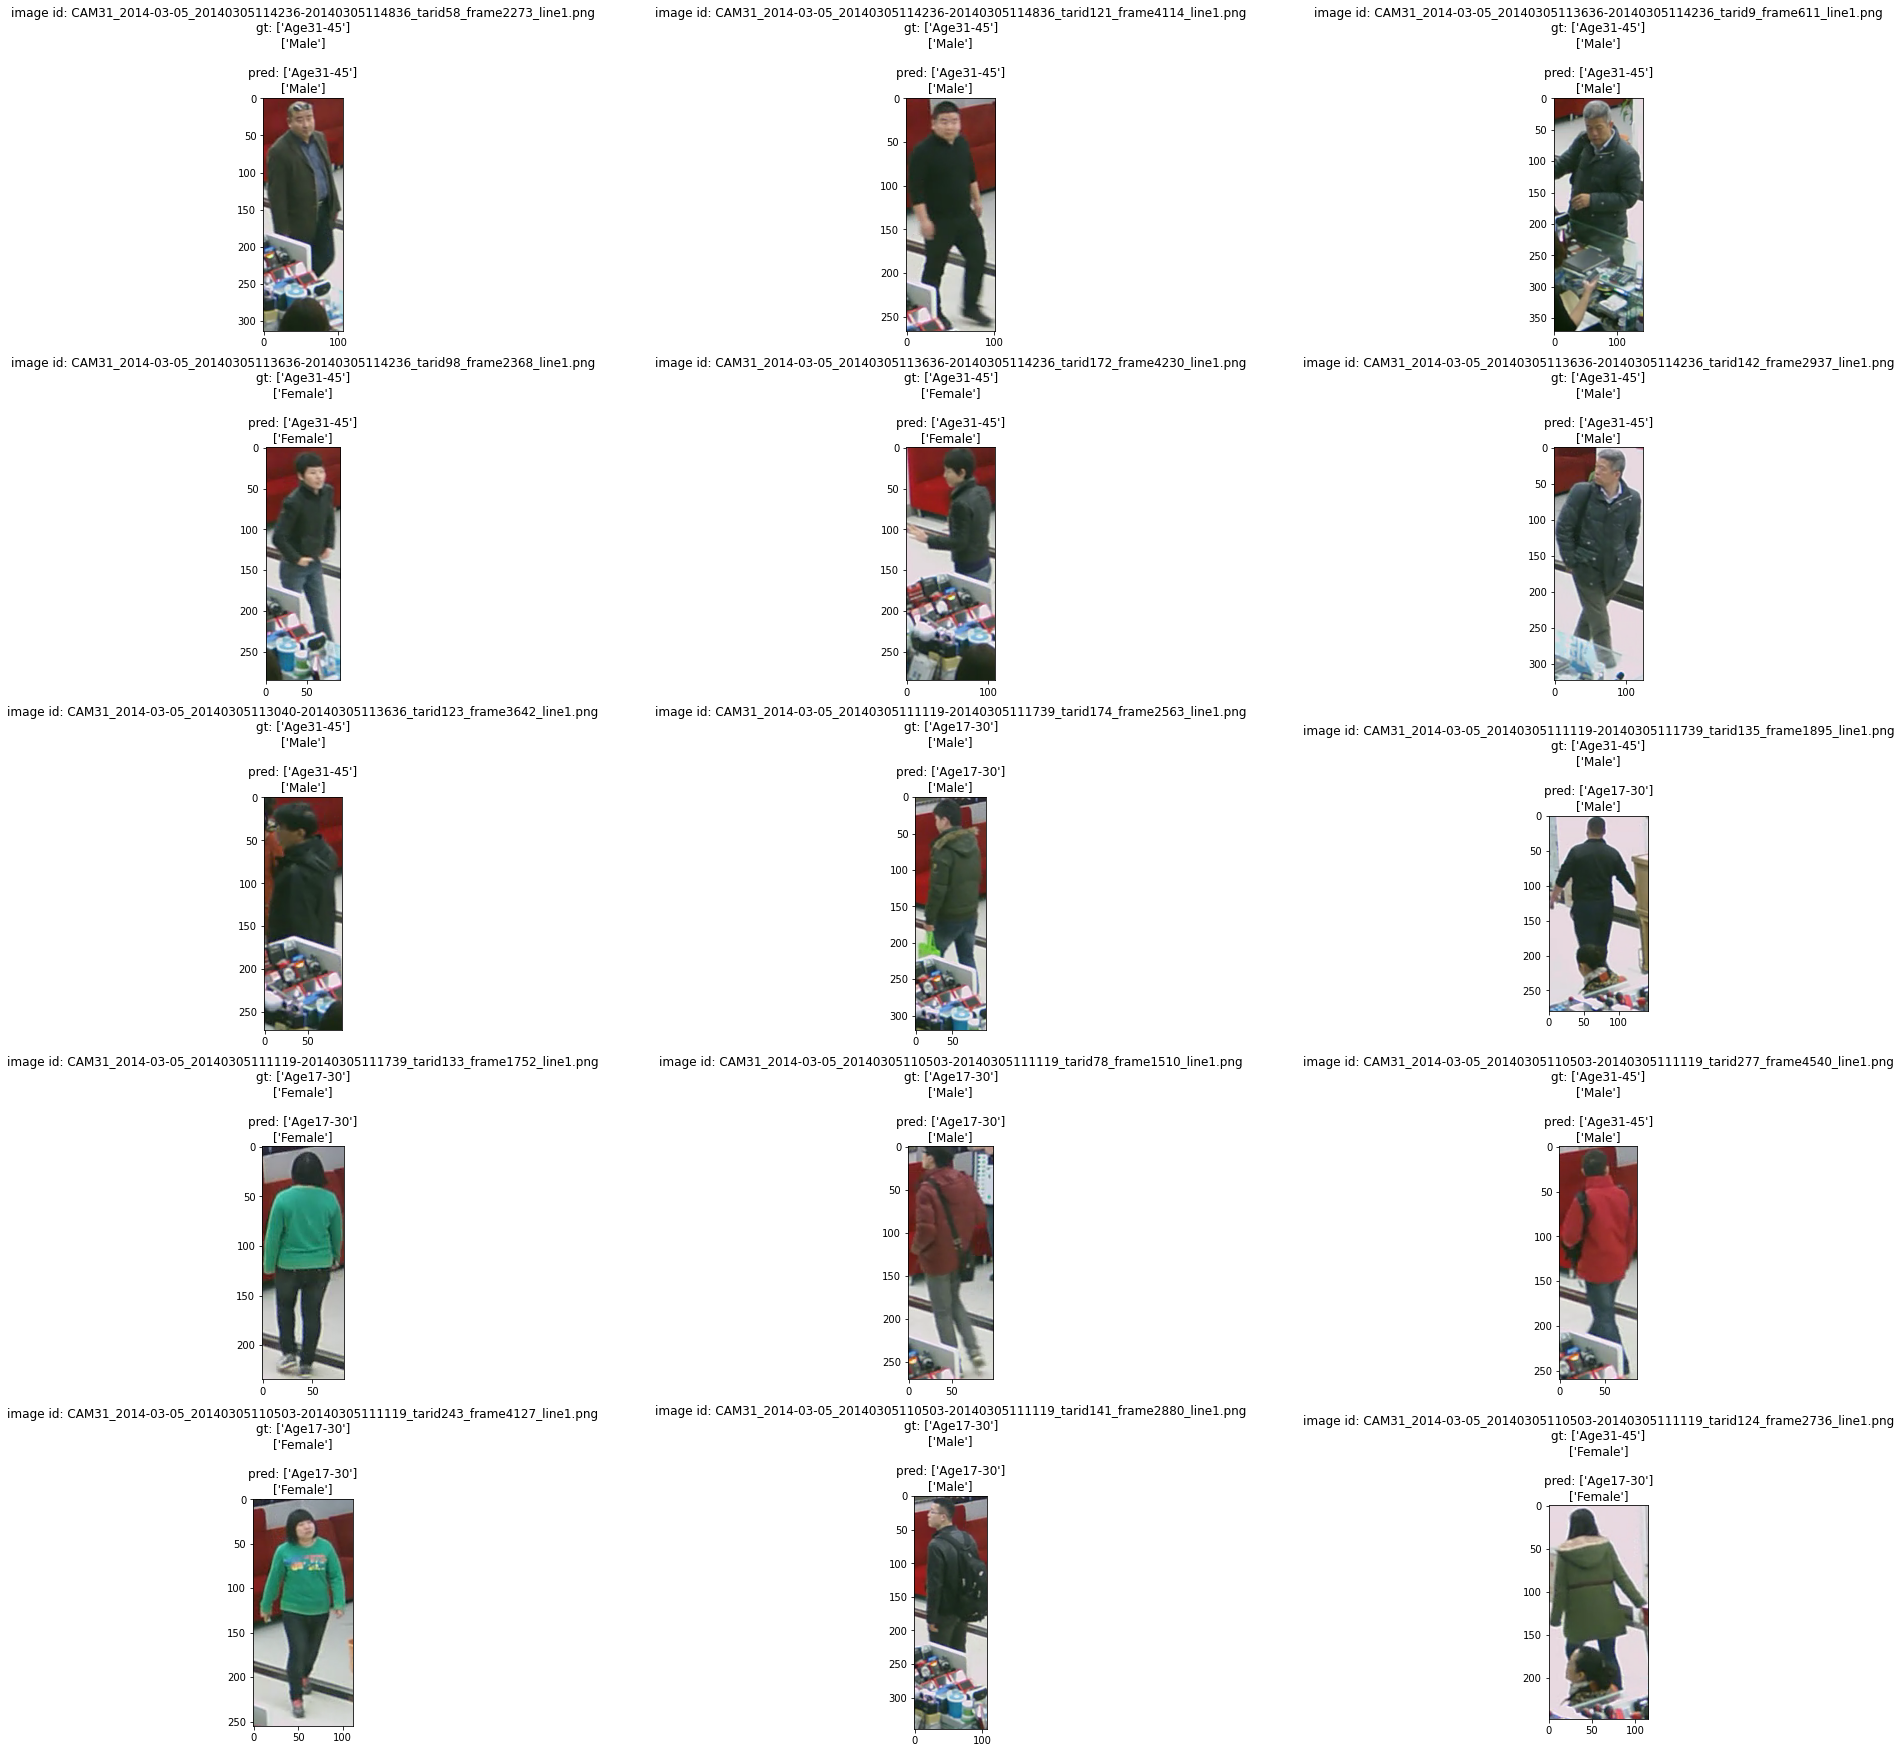

In [9]:
result_all = pd.read_pickle('../../models/efficientnetb0_adamw_plateau/20201231_18_28_10/result/test/result.pkl')
img_dir = '../../data/person_attribute/raw/images'
dataset_name = 'person_attribute'
plot_results(result_all, img_dir, dataset_name)

In [10]:
# img_dir = '../data/PETA/images'
# dataset_name = 'peta_age_gender'
# plot_results(result_peta, img_dir, dataset_name)

In [11]:
# img_dir = '../data/PETA/images'
# dataset_name = 'peta_age_gender'
# plot_results(result_peta, img_dir, dataset_name)

In [12]:
# img_dir = '../data/PA100k/data/'
# dataset_name = 'pa100k_age_gender' #'pa100k'
# plot_results(result_pak100k, img_dir, dataset_name)

In [13]:
# img_dir = '../data/RAP/RAP_dataset'
# dataset_name = 'rap_age_gender'
# plot_results(result_rap, img_dir, dataset_name)

In [14]:
# img_dir = '../data/RAP2/RAP_dataset'
# dataset_name = 'rap2_age_gender'
# plot_results(result_rap2, img_dir, dataset_name)